In [1]:
import darts
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from darts.timeseries import TimeSeries
from darts.dataprocessing.transformers.scaler import Scaler
from darts.dataprocessing.transformers.missing_values_filler import MissingValuesFiller
from darts.utils.statistics import (check_seasonality,
                                    plot_residuals_analysis,
                                    stationarity_tests,
                                    plot_acf,extract_trend_and_seasonality)
from darts.metrics.metrics import mae
from darts.models.forecasting.auto_arima import AutoARIMA
from darts.models.forecasting.nhits import NHiTSModel
from darts.models.forecasting.nbeats import NBEATSModel
#from darts.models.forecasting.lgbm import LightGBMModel
from darts.models.forecasting.tcn_model import TCNModel

plt.style.use('seaborn')

/tmp/ipykernel_125842/2938975019.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
df = pd.read_csv('./data/Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [4]:
series = TimeSeries.from_series(df['IPG2211A2N'])

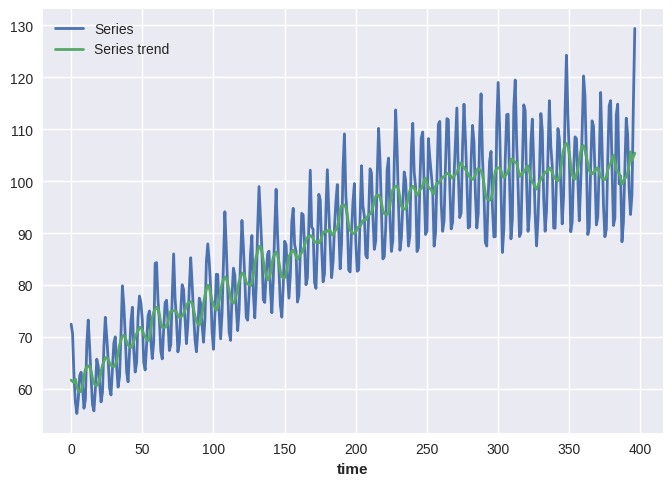

In [5]:
# Check Series Seasonality
if (check_seasonality(ts=series)[0]):
    trend = extract_trend_and_seasonality(ts=series,
                                          freq=check_seasonality(ts=series)[1])
    series.plot(label='Series')
    trend[0].plot(label='Series trend')

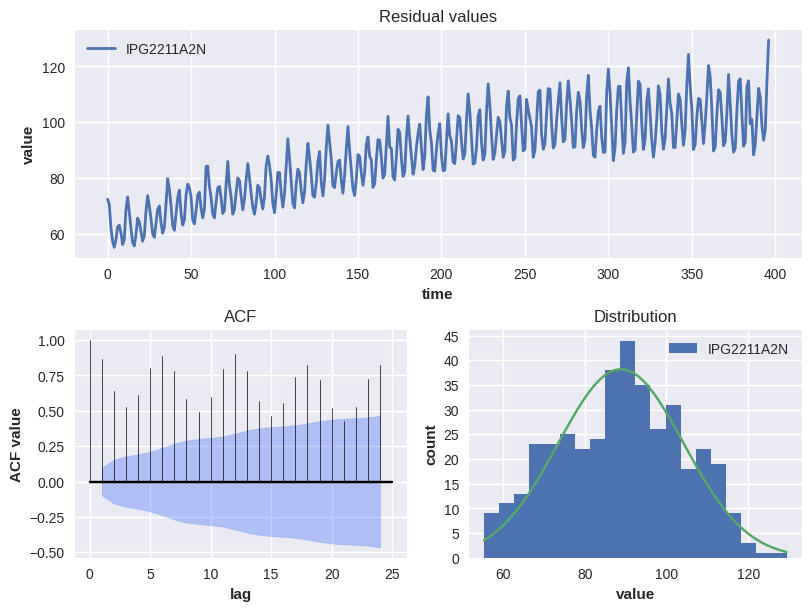

In [6]:
# Statistical analysis
plot_residuals_analysis(residuals=series)

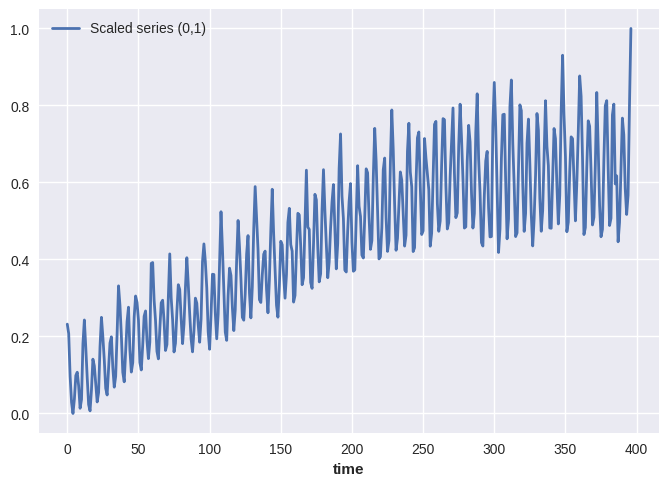

In [7]:
# Data Scaling
MinMax = MinMaxScaler(feature_range=(0,1))
scaler = Scaler(MinMax)

scaled_series = scaler.fit_transform(series)
scaled_series.plot(label='Scaled series (0,1)')

In [8]:
len(scaled_series)

397

In [9]:
# Train/test split
train_series = scaled_series[:250] 
test_series = scaled_series[250:]

In [10]:
len(test_series)

147

In [11]:
# Hyperparameters
input_size = 100
output_size = 50
epochs = 50
batch_size = 64

# Models implementation
nhits = NHiTSModel(input_chunk_length=input_size,
                   output_chunk_length=output_size,
                   batch_size=batch_size)

nbeats = NBEATSModel(input_chunk_length=input_size,
                     output_chunk_length=output_size,
                     batch_size=batch_size)

arima = AutoARIMA()

tcn = TCNModel(input_chunk_length=input_size,
               output_chunk_length=output_size,
               batch_size=batch_size)


In [12]:
# Training models
nhits.fit(series=train_series, epochs=epochs)

nbeats.fit(series=train_series, epochs=epochs)

arima.fit(series=train_series)

tcn.fit(series=train_series, epochs=epochs)

2023-02-03 16:50:55 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2023-02-03 16:50:55 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2023-02-03 16:50:55 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2023-02-03 16:50:55 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
/home/douglas/miniconda3/envs/ptp_holdover/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1814: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
2023-02-03 16:50:56 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList   

A Jupyter Widget

2023-02-03 16:50:59 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2023-02-03 16:50:59 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2023-02-03 16:50:59 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2023-02-03 16:50:59 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2023-02-03 16:50:59 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.8 M 
---------------------------------------------------
6.8 M     Trainable params
1.9 K     Non-trainable params
6.8 M     Total params
54.408    Total estimated model params size (MB)


A Jupyter Widget

2023-02-03 16:51:18 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2023-02-03 16:51:18 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2023-02-03 16:51:18 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2023-02-03 16:51:18 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
/home/douglas/miniconda3/envs/ptp_holdover/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1814: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
2023-02-03 16:51:18 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCar

A Jupyter Widget

In [13]:
pred_nhits =nhits.predict(n=len(test_series))
pred_nbeats =nbeats.predict(n=len(test_series))
pred_arima =arima.predict(n=len(test_series))
pred_tcn =tcn.predict(n=len(test_series))

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

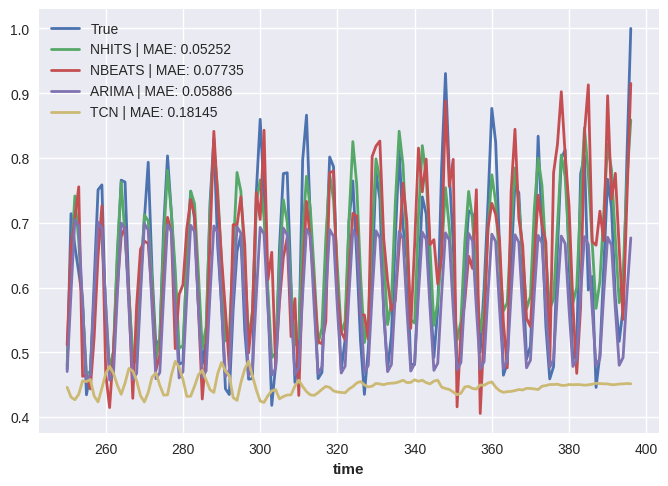

In [14]:
test_series.plot(label='True')
pred_nhits.plot(label=f'NHITS | MAE: {mae(test_series,pred_nhits):.5f}')
pred_nbeats.plot(label=f'NBEATS | MAE: {mae(test_series,pred_nbeats):.5f}')
pred_arima.plot(label=f'ARIMA | MAE: {mae(test_series,pred_arima):.5f}')
pred_tcn.plot(label=f'TCN | MAE: {mae(test_series,pred_tcn):.5f}')